# Data Analysis for Customs and Border Protection - Drugs


- Data File Name: sector_profile_1960_2018.csv

CSV file has:


- drug data for marijuana and cocaine for each sector and aggregated count for southwest border per fiscal year 

- drugs measured in pounds. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
swborder_checkpoints_df = pd.read_csv('../data/sector_profile_1960_2018.csv')

In [4]:
swborder_checkpoints_df

,sector,fiscal_year,number_of_agents,total_apprehensions,other_than_mexican_apprehensions,marijuana_pounds,cocaine_pounds,accepted_prosecutions,assaults,rescues,deaths,accompanied_juveniles,unaccompanied_juveniles,total_juveniles,total_adults,female_apprehensions,male_apprehensions,family_apprehensions
0,big bend,2018,499.0,8045,4634.0,26651.0,65.0,5128.0,11.0,1622.0,10.0,399.0,989.0,1388.0,2377.0,906.0,7139.0,741.0
1,del rio,2018,1366.0,15833,8359.0,1870.0,80.0,10925.0,12.0,71.0,24.0,1557.0,1297.0,2854.0,4151.0,2886.0,12947.0,2829.0
2,el centro,2018,844.0,29230,10449.0,623.0,165.0,2718.0,34.0,110.0,17.0,1884.0,2715.0,4599.0,7314.0,4302.0,24928.0,3539.0
3,el paso,2018,2171.0,31561,22159.0,15156.0,324.0,13048.0,54.0,14.0,4.0,6564.0,5461.0,12025.0,17486.0,9931.0,21630.0,12312.0
4,laredo,2018,1779.0,32641,10362.0,59237.0,387.0,13882.0,31.0,13.0,69.0,316.0,2879.0,3195.0,6074.0,3848.0,28793.0,597.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,rio grande valley,1960,NaN,5515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,san diego,1960,NaN,3371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,tucson,1960,NaN,1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,yuma,1960,NaN,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#subset df by sector='southwest border' (which will give you the overall data(agreggated) for each year)
row_filter = swborder_checkpoints_df['sector']=='southwest border'
row_filter
swborder_overall=swborder_checkpoints_df[(row_filter)]

In [27]:
#set fiscal year as index
swborder_overall2=swborder_overall.set_index('fiscal_year')
swborder_overall2

,sector,number_of_agents,total_apprehensions,other_than_mexican_apprehensions,marijuana_pounds,cocaine_pounds,accepted_prosecutions,assaults,rescues,deaths,accompanied_juveniles,unaccompanied_juveniles,total_juveniles,total_adults,female_apprehensions,male_apprehensions,family_apprehensions
fiscal_year,,,,,,,,,,,,,,,,,
2018,southwest border,16608.0,396579,244322.0,458834.00,4838.00,109317.0,774.0,4307.0,283.0,57210.0,50036.0,107246.0,289333.0,95980.0,300599.0,14554.0
2017,southwest border,16605.0,303916,175978.0,857888.00,6174.00,59805.0,774.0,3221.0,294.0,41131.0,41435.0,82566.0,221350.0,80857.0,223059.0,6074.0
2016,southwest border,17026.0,408870,218110.0,1292105.00,4184.00,74255.0,439.0,3964.0,322.0,42413.0,59692.0,102105.0,306765.0,100515.0,308355.0,6169.0
2015,southwest border,17522.0,331333,145316.0,1536499.00,4294.00,78324.0,373.0,2183.0,240.0,22004.0,39970.0,61974.0,269359.0,71463.0,259870.0,1734.0
2014,southwest border,18156.0,479371,252600.0,1920411.00,4443.00,91729.0,366.0,1457.0,307.0,38845.0,68541.0,107386.0,371985.0,119415.0,359956.0,675.0
2013,southwest border,18611.0,414397,148988.0,2428419.00,3910.00,103040.0,461.0,2346.0,445.0,8479.0,38759.0,47238.0,367159.0,68645.0,345752.0,220.0
2012,southwest border,18516.0,356873,94532.0,2297662.00,5992.10,92205.0,549.0,1312.0,463.0,6436.0,24403.0,30839.0,326034.0,51620.0,305253.0,NaN
2011,southwest border,18506.0,327577,46997.0,2518211.42,8762.73,74975.0,666.0,1070.0,357.0,6902.0,15949.0,22851.0,304726.0,42590.0,284984.0,NaN
2010,southwest border,NaN,447731,NaN,NaN,NaN,NaN,NaN,NaN,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
swborder_overall2.dtypes

sector                               object
number_of_agents                    float64
total_apprehensions                   int64
other_than_mexican_apprehensions    float64
marijuana_pounds                    float64
cocaine_pounds                      float64
accepted_prosecutions               float64
assaults                            float64
rescues                             float64
deaths                              float64
accompanied_juveniles               float64
unaccompanied_juveniles             float64
total_juveniles                     float64
total_adults                        float64
female_apprehensions                float64
male_apprehensions                  float64
family_apprehensions                float64
dtype: object

<AxesSubplot:title={'center':'Marijuana and Cocaine Seizures(lbs) by Type for Fiscal Years'}, xlabel='Fiscal Year', ylabel='Drug Seizures(lbs) in Millions'>

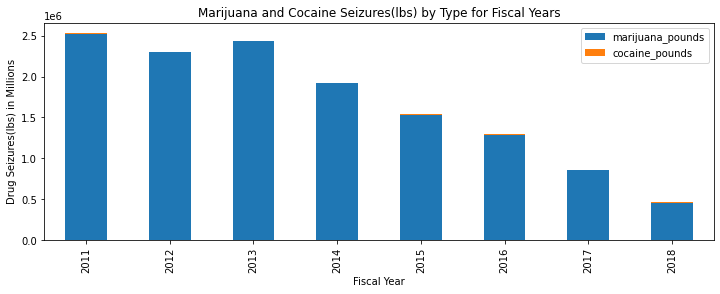

In [38]:
#lets plot the pounds of cocaine/marijuana over fiscal years 

#making cols_to_plot-> marijuana_pounds & cocaine_pounds
cols_to_plot = ['marijuana_pounds', 'cocaine_pounds']

#sorting by index for years
swborder_overall2 = swborder_overall2.sort_index()

# select the rows you want to plot
year_filter = swborder_overall2.index>2010

swborder_overall2[year_filter][cols_to_plot].plot(kind='bar', stacked=True, xlabel='Fiscal Year', ylabel='Drug Seizures(lbs) in Millions', title='Marijuana and Cocaine Seizures(lbs) by Type for Fiscal Years', figsize=(12,4))

In [37]:
swborder_overall2[year_filter][cols_to_plot].max

<bound method DataFrame.max of              marijuana_pounds  cocaine_pounds
fiscal_year                                  
2011               2518211.42         8762.73
2012               2297662.00         5992.10
2013               2428419.00         3910.00
2014               1920411.00         4443.00
2015               1536499.00         4294.00
2016               1292105.00         4184.00
2017                857888.00         6174.00
2018                458834.00         4838.00>

In [46]:
#Looking at drug seizures(marijuana and cocaine) by sector 

#setting df to only include checkpoints and not the aggregated rows
swborder_checkpoints_df2= swborder_checkpoints_df[(-row_filter)]
swborder_checkpoints_df2

,sector,fiscal_year,number_of_agents,total_apprehensions,other_than_mexican_apprehensions,marijuana_pounds,cocaine_pounds,accepted_prosecutions,assaults,rescues,deaths,accompanied_juveniles,unaccompanied_juveniles,total_juveniles,total_adults,female_apprehensions,male_apprehensions,family_apprehensions
0,big bend,2018,499.0,8045,4634.0,26651.0,65.0,5128.0,11.0,1622.0,10.0,399.0,989.0,1388.0,2377.0,906.0,7139.0,741.0
1,del rio,2018,1366.0,15833,8359.0,1870.0,80.0,10925.0,12.0,71.0,24.0,1557.0,1297.0,2854.0,4151.0,2886.0,12947.0,2829.0
2,el centro,2018,844.0,29230,10449.0,623.0,165.0,2718.0,34.0,110.0,17.0,1884.0,2715.0,4599.0,7314.0,4302.0,24928.0,3539.0
3,el paso,2018,2171.0,31561,22159.0,15156.0,324.0,13048.0,54.0,14.0,4.0,6564.0,5461.0,12025.0,17486.0,9931.0,21630.0,12312.0
4,laredo,2018,1779.0,32641,10362.0,59237.0,387.0,13882.0,31.0,13.0,69.0,316.0,2879.0,3195.0,6074.0,3848.0,28793.0,597.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,laredo,1960,NaN,1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,rio grande valley,1960,NaN,5515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,san diego,1960,NaN,3371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,tucson,1960,NaN,1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
swborder_checkpoints_df2.groupby('sector')['marijuana_pounds'].sum()

sector
big bend              314898.94
del rio               232862.24
el centro              92305.36
el paso               371457.19
laredo                893547.80
rio grande valley    4666653.60
san diego             219927.69
tucson               6225446.69
yuma                  292931.92
Name: marijuana_pounds, dtype: float64

In [59]:
swborder_checkpoints_df2.groupby('sector')['cocaine_pounds'].sum()

sector
big bend               579.26
del rio                766.28
el centro             3584.77
el paso               1488.46
laredo                4830.42
rio grande valley    15102.04
san diego            13312.35
tucson                1363.60
yuma                  1568.67
Name: cocaine_pounds, dtype: float64

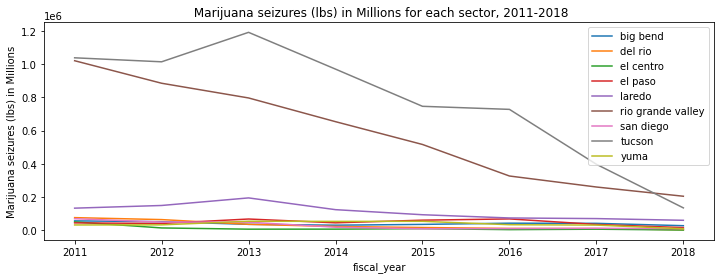

In [66]:
swborder_checkpoints_df2.index = swborder_checkpoints_df2['fiscal_year'].astype(int)
swborder_checkpoints_df2_plot=swborder_checkpoints_df2.groupby('sector')['marijuana_pounds'].plot(figsize=(12,4), 
                                                     legend=True, ylabel='Marijuana seizures (lbs) in Millions', title=' Marijuana seizures (lbs) in Millions for each sector, 2011-2018')

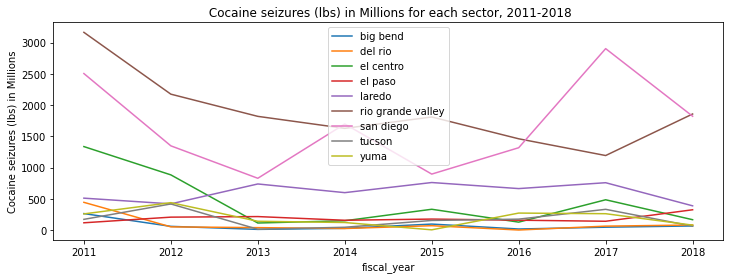

In [67]:
swborder_checkpoints_df2.index = swborder_checkpoints_df2['fiscal_year'].astype(int)
swborder_checkpoints_df2_plot=swborder_checkpoints_df2.groupby('sector')['cocaine_pounds'].plot(figsize=(12,4), 
                                                     legend=True, ylabel='Cocaine seizures (lbs) in Millions', title=' Cocaine seizures (lbs) in Millions for each sector, 2011-2018')